In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.append('/Users/zhengj10/Python/Modules')
import PatcherBot as pb
import tifffile as tff
import h5py


In [5]:
# sumPath = '/Users/zhengj10/Desktop/GENIE/Data/PatcherBot/summary'
sumPath = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/summary'
# savePath = '/Users/zhengj10/Desktop/201104'
# if not os.path.exists(savePath):
#     os.mkdir(savePath)
# imgPath = '/Volumes/genie/Jihong_GENIE_stuff/patch-screen/bot'
# rawPath = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw'


In [6]:
os.path.exists(sumPath)

True

### V-Clamp data

In [7]:
# df = pd.read_pickle(sumPath+'/Summary_VC_all_Nov_combo.pkl')
# df = pd.read_pickle(sumPath+'/Summary_pos_to_neg_VC.pkl')
# df_p = pd.read_pickle(sumPath+'/Plot_Voltron_single_mutants.pkl')
# df_p = pd.read_pickle(sumPath+'/Summary_varnam.pkl')

df = pd.read_pickle(sumPath+'/Summary_VC_all_new_analysis.pkl')


In [11]:
# df[df['Mutation']=='421.1']

In [9]:
# df.Mutation.unique()
df.Date.unique()

array(['2020.01.16_000', '2020.01.16_000-voltron', '2020.01.17_000',
       '2020.01.24_000', '2020.02.03_000', '2020.02.03_000-voltron',
       '2020.02.04_000', '2020.02.10_000', '2020.02.11_000',
       '2020.02.18_000-voltron', '2020.02.19_000',
       '2020.02.19_000-voltron', '2020.02.20_000',
       '2020.02.24_000-voltron', '2020.03.02_000', '2020.06.25_000',
       '2020.06.25_000-voltron', '2020.07.14_000', '2020.07.29_000',
       '2020.07.30_000', '2020.08.11_000', '2020.08.12_000',
       '2020.08.13_000', '2020.08.18_000', '2020.08.19_000',
       '2020.08.20_000', '2020.08.20_000-voltron', '2020.08.26_000',
       '2020.08.26_000-voltron', '2020.08.27_000',
       '2020.08.27_000-varnam', '2020.09.16_000', '2020.09.21_000',
       '2020.09.21_001', '2020.09.22_000', '2020.10.15_000',
       '2020.10.28_001', '2020.10.28_001-varnam'], dtype=object)

In [27]:
labels_dict = {
    # Voltron and Voltron 2
    '421.1':'Voltron',
    '421.2096':'Voltron 2',
    '476.4495': 'Voltron 2-ST',
    
    # Voltron Combo mutants
    '421.4909':'Voltron N69E R78H A122D V196P',
    '421.4919':'Voltron R78H A122D V196P',
    '421.4876':'Voltron N69E A122D',
    '421.4892':'Voltron N69E V196P',
    '421.6051':'Voltron R78H L89C A122D V196P',
    '421.5649':'Voltron Y63L N69E L89C A122D',
    '421.6052':'Voltron Y63L L89C A122D V196P',
    '421.5658':'Voltron Y63L L89C A122D',
    '421.4951':'Voltron Y63L V74W L89T',
    '421.5657':'Voltron R78H L89C A122D',
    '421.5659':'Voltron L89C A122D',
    '421.5650':'Voltron N69E L89C A122D',
    '421.5657':'Voltron R78H L89C A122D',
    '421.5616':'Voltron V74E L89C',
    '421.5619':'Voltron Y63L L89C',
    '421.5658':'Voltron Y63L L89C A122D',
    '421.5649':'Voltron Y63L N69E L89C A122D',
    '421.5462':'Voltron N69E R78H N81S L89C A122D',
    '421.5951':'Voltron R78H N81S L89C A122D',
    '421.6051':'Voltron R78H L89C A122D V196P',
    '421.5922':'Voltron Y63L A122D V196P',
    '421.6052':'Voltron Y63L L89C A122D V196P',
    '421.6004':'Voltron Y63L N69E N81S',
    '421.6155':'Voltron Y63L L89T A122D V196P',
    '421.5952':'Voltron Y63L N81S L89C A122D',
    '421.5444':'Voltron Y63L R78H A122D V196P',
    '421.5953':'Voltron V74W R78H N81S L89C A122D',
    '421.6232':'Voltron Y63L V74E N81S',
    '421.5076':'Voltron Y63L N69E R78H N81S L89C',
    '421.5740':'Voltron V74E R78H N81S V196P',
    '421.4911':'Voltron N69E A122D V196P',
    '421.5152':'Voltron N69E V74W R78H N81S L89C A122H V196P',
    '421.5387':'Voltron V74E R78H L89C V196P',
    '421.5414':'Voltron V74W R78H L89C A122H V196P',
    '421.5448':'Voltron R78H A122H V196P',
    '421.5617':'Voltron Y63L R78H L89C',
    '421.5751':'Voltron N69E R78H N81S A122D V196P',
    '421.4850':'Voltron N69E R78H',
    '421.4875':'Voltron Y63L N69E R78H A122D',
    '421.4882':'Voltron R78H A122D',
    '421.4910':'Voltron Y63L N69E A122D V196P',
    '421.5760':'Voltron R78H N81S A122D V196P',
    '421.6053':'Voltron L89C A122D V196P',
    '421.6038':'Voltron Y63L N69E R78H L89C A122D V196P',
    
    # Voltron Single mutants
    '421.2907':'Voltron (A122X)',
    '421.2335':'Voltron (Y63P)',
    '421.2336':'Voltron (Y63T)',
    '421.2346':'Voltron (Y63I)',
    '421.3002':'Voltron (V74D)',
    '421.3046':'Voltron (V74S)',
    '421.3028':'Voltron (V74W)',
    '421.303':'Voltron (Y146X)',
    '421.3012':'Voltron (V74G)',
    '421.2379':'Voltron (Y63K)',
    '421.2347':'Voltron (Y63D)',
    '421.3067':'Voltron (V74H)',
    '421.2203':'Voltron (R78N)',
    '421.3006':'Voltron (V74P)',
    '421.1069':'Voltron (N69E)',
    '421.1076':'Voltron (N69P)',
    '421.3054':'Voltron (N74E)',
    '421.3167':'Voltron (L89T)',

    # ASAP1 variants
    '376.1':'ASAP1',
    '376.13':'ASAP1 (T392V)',
    
    # ASAP3b variants
    '414.1':'GS-ASAP3b',
    '376.20950':'ASAP3b (T392V)',
    '376.20949':'ASAP3b (T392Y)',
    '485.20950':'ASAP3b (T392V)-ST',
    '376.20948':'ASAP3b',
    '485.20949':'ASAP3b (T392Y)-ST',
    '485.6':'ASAP3b-ST',
    '376.17995':'ASAP3b N391L T392I',
    '376.18153':'ASAP3b N391I T392V',
    '533.1':'ASAP3b-Kv',
    
    # Amy's Feb batch of ASAP3b variants
    'ASAP3b.T392V.H':'pCAG0–ASAP3b (T392V)-NL-SOM2 (Lin)',
    'ASAP3b.T392V.G':'pCAG0–ASAP3b (T392V)-lTlcnC',
    'ASAP3b.T392V.F':'pCAG0–ASAP3b (T392V)-NL-SOM2 (GENIE)',
    'ASAP3b.T392V.I':'pCAG0–ASAP3b (T392V)-GSS3-SOM2-lTlcnC',
    'ASAP3b.T392V.J':'376.2095 / pCAG-ASAP3b (T392V)',
    'ASAP3b.T392V.C':'pCAG0–ASAP3b (T392V)-GSSlong-SOM2 (GENIE)',
    'ASAP3b.T392V.B':'pCAG0–ASAP3b (T392V)-KGC-GSS3-ER2-GSS3-SOM2 (GENIE)',
    'ASAP3b.T392V.A':'pCAG0–ASAP3b (T392V)-GSS3TR-SOM2 (GENIE)',
    'ASAP3b.T392V.E':'485.2095 / pCAG–ASAP3b (T392V)-TS-ER-SOM2',
    'ASAP3b.T392V.D':'533.1 / pCAG-ASAP3-Kv (Lin)',    
    
    # Amy's Jul batch of ASAP3b variants
    'N4':'ASAP3b (T392V)-TS-ER-SOM2 miniprep',
    'O5':'ASAP3b (T392V)-GSSlong-SOM2 (GENIE)',
    'M3':'ASAP3b (T392V)-NL-SOM2 (GENIE)',
    'L2':'ASAP3b (T392V)-GSS3-SOM2-lTlcnC',
    'Q7':'ASAP3b (T392V)-GSS3TR-SOM2 (GENIE)',
    'P6':'ASAP3b (T392V) maxiprep',
    'S9':'ASAP3b (T392V)-NL-SOM2 (Lin)',
    'T10':'pCAG-ASAP3b (T392V)-lTlcnC',
    'R8':'ASAP3b-TS-ER-SOM2 maxiprep',
    'W13':'ASAP3b (T392V) miniprep',
    'X14':'ASAP3-Kv (Lin) maxiprep',
    'Y15':'ASAP3b-TS-ER-SOM2 miniprep',
    'U11':'ASAP3-Kv (Lin) miniprep',
    'V12':'ASAP3b (T392V)-KGC-GSS3-ER2-GSS3-SOM2 (GENIE)',
    'K1':'ASAP3b (T392V)-TS-ER-SOM2 maxiprep',
    
    # Other Ace2N based sensors
    '487.1':'Ace2N-4AA-mNeon',
    '557.1':'CMV-VARNAM',
    '558.1':'CAG-VARNAM',
    '487.6':'Ace2N-4AA-mNeon A122D',
    '488.6':'Ace2N-4AA-mNeon A122D-ST',
    '558.2':'CAG-VARNAM A122D',
    '557.2':'CMV-VARNAM A122D'
}


In [35]:
df = df.drop(df.index[250])

In [36]:
# sensors = ['421.1','421.2096']

# sensors = ['421.4909','421.2096']

# sensors = ['421.1','476.1']

sensors = ['421.1','421.2096','421.3012','421.3028','421.2336','421.2203','421.3067','421.1069','421.1076',
           '421.3054', '421.3167']

# sensors = ['421.1','421.2096','421.5649','421.4909','421.5657','421.5616','421.6051','421.5951',
#            '421.4919','421.4892','421.5658','421.6052','421.4876','421.5650','421.6155','421.5952','421.4911',
#            '421.5152','421.5387','421.5414','421.5448','421.5617','421.5751','421.4850','421.4875','421.4882',
#            '421.4910','421.5760','421.6053','421.5462','421.5659','421.6004','421.6038']

# sensors = ['557.1','557.2']

# sensors = ['487.1','487.6']

In [37]:
threshold = {'leak':-300, 'Ra':50}


In [38]:
df_p = df[(df.Leak_min>threshold['leak'])&(df.Ra_max<threshold['Ra'])]
df_p.shape


(294, 30)

#### F-V curve

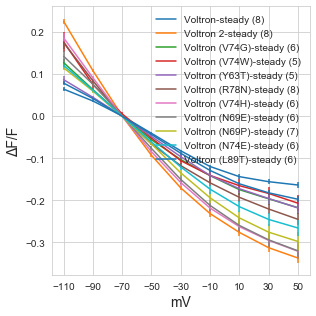

In [43]:
import unicodedata
import seaborn as sns

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42



fig = plt.figure(figsize=[4.5,4.5])
sns.set_style('whitegrid')


# n = len(sensors)
# colors = plt.cm.tab20(np.linspace(0,1,n))
# c = 0

colors = {1:'#1f77b4', 2:'#ff7f0e', 3:'#2ca02c', 4:'#d62728'}
x = np.linspace(-110,50,9)
i = 1
j = 1
ax = plt.subplot(111)
for sensor in sensors:
    df_sensor = df_p[(df_p.Mutation==sensor)&(df_p.Objective=='40x oil GENIE')]
    


    param_mean = np.mean(df_sensor.dFF.to_list(),axis=0)
    param_sem = np.std(df_sensor.dFF.to_list(),axis=0)/np.sqrt(len(df_sensor))
    ax.errorbar(x, np.flip(param_mean), yerr = np.flip(param_sem),
                label = labels_dict[sensor] +'-steady (%d)' %len(df_sensor))
    
        

    
# Following block remove the errorbars from legend
handles, labels = ax.get_legend_handles_labels() 
handles = [h[0] for h in handles]
ax.legend(handles, labels, frameon=False)
# ax.legend(handles, labels, frameon=False)


ax.set_xlabel('mV',size=14)
ax.set_ylabel('\u0394F/F',size=14)
plt.setp(ax, xticks=x)
plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/GENIE/Meeting/GENIE post pipeline/201209/Combo_mutations_40x_air.pdf',format='pdf')
# fig.savefig('/Users/zhengj10/Desktop/VARNAM_original_dFF.pdf',format='pdf')
# fig.savefig('/Users/zhengj10/Desktop/210303/VARNAM_F-V.png')
plt.show()


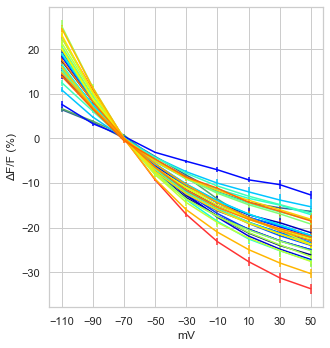

In [49]:
from matplotlib import font_manager
# fig = plt.figure(figsize=[3.5,4.5]) # for Voltron 2 paper
# fig = plt.figure(figsize=[4.5,5]) # for default plotting with smaller N
# fig = plt.figure(figsize=[7.6,10]) # with legend
fig = plt.figure(figsize=[4.75,5]) # without legend

sns.set(style='whitegrid')
x = np.linspace(-110,50,9)
# x = [-110,-90,-50,-30,-10,10,30,50]
# sensors = ['421.1','421.2096']

# sensors = ['421.4909','421.2096']

# sensors = ['421.1','476.1']

# sensors = ['421.1','421.2096','421.3012','421.3028','421.2336','421.2203','421.3067','421.1069','421.1076',
#            '421.3054', '421.3167']

sensors = ['421.1','421.2096','421.5649','421.4909','421.5657','421.5616','421.6051','421.5951',
           '421.4919','421.4892','421.5658','421.6052','421.4876','421.5650','421.6155','421.5952','421.4911',
           '421.5152','421.5387','421.5414','421.5448','421.5617','421.5751','421.4850','421.4875','421.4882',
           '421.4910','421.5760','421.6053','421.5462','421.5659','421.6004','421.6038']

# sensors = ['557.1','557.2']

# sensors = ['487.1','487.6']

lw = 2
ax= plt.subplot(111)

n = len(sensors)
colors = plt.cm.jet(np.linspace(0,0.85,n))
c=0


for sensor in sensors:
    df_sensor = df_p[df_p.Mutation==sensor]

    if sensor in ['421.1','487.1']:
        mean = np.mean(df_sensor['dFF'].to_list(),axis=0)
        sem = np.std(df_sensor['dFF'].to_list(),axis=0)/np.sqrt(len(df_sensor))
        mean = np.flip(mean)*100
        sem = np.flip(sem)*100
        ax.errorbar(x, mean, yerr=sem, fmt = '-',label = labels_dict[sensor]+' (%d)' %len(df_sensor),
                   color='#336699')
        
        mean = np.mean(df_sensor['peak_dFF'].to_list(),axis=0)
        sem = np.std(df_sensor['peak_dFF'].to_list(),axis=0)/np.sqrt(len(df_sensor))
        mean = np.flip(mean)*100
        sem = np.flip(sem)*100
        ax.errorbar(x, mean, yerr=sem, fmt = '-',label = 'Voltron peak'+' (%d)' %len(df_sensor),
                    color='g')
    elif sensor == '421.2096':
        mean = np.mean(df_sensor['dFF'].to_list(),axis=0)
        sem = np.std(df_sensor['dFF'].to_list(),axis=0)/np.sqrt(len(df_sensor))
        mean = np.flip(mean)*100
        sem = np.flip(sem)*100
        ax.errorbar(x, mean, yerr=sem, fmt = '-',label = labels_dict[sensor]+' (%d)' %len(df_sensor),
                   color='#FF3333')
    else:
        mean = np.mean(df_sensor['dFF'].to_list(),axis=0)
        sem = np.std(df_sensor['dFF'].to_list(),axis=0)/np.sqrt(len(df_sensor))
        mean = np.flip(mean)*100
        sem = np.flip(sem)*100
#         ax.errorbar(x, mean, yerr=sem, fmt = '-',label = labels_dict[sensor]+' (%d)' %len(df_sensor))
        
        ax.errorbar(x, mean, yerr=sem, fmt = '-',label = labels_dict[sensor]+' (%d)' %len(df_sensor),
            color = colors[c])
        
        c+=1
    
ax.set_xlabel('mV')
ax.set_ylabel('\u0394F/F (%)')

## Following legend commands designed for Voltron 2 paper
font = font_manager.FontProperties(weight='bold',style='normal')
# leg = ax.legend(handlelength=0,handletextpad = -0.21,markerscale=0,bbox_to_anchor=(0.8,1.3),frameon=False,prop=font)

# for item in leg.legendHandles: # remove line marker in legend
#     item.set_visible(False)

# for artist, text in zip(leg.legendHandles, leg.get_texts()): # set text the same color as line
#     col = artist.get_color()
#     if isinstance(col, np.ndarray):
#         col = col[0]
#     text.set_color(col)

# leg = ax.legend(bbox_to_anchor=(1,1))
# leg = ax.legend()
# for item in leg.legendHandles: # remove line marker in legend
#     item.set_visible(False)

plt.xticks(x)
plt.tight_layout()
# plt.savefig(sumPath+'F-V curve.pdf',format='pdf')
plt.savefig('/Users/zhengj10/Desktop/210407/Voltron_combo_mutants_Bens_code.png')
plt.show()


In [34]:
for i,r in df.iterrows():
    if r.dFF[0]>0:
        print(i)

250


In [27]:
df_p

,Date,Plate,Well,Cell,Mutation,Transfected_date,Leak,Ra,dFF,F0,...,tau_on_f_double,tau_off_f_double,tau_on_s_double,tau_off_s_double,time_on_10-90,time_off_10-90,Leak_min,Ra_max,peak_dFF,Objective
0,2021.03.03_000,plate_000,well_1,patch_attempt_0000_000,421.1,210223,"[-8.51146335323723, -11.243772409311036, -19.8...","[-1057.365960924749, -764.9392708633397, 22.60...","[-0.11915205376274848, -0.08945224776266342, -...","[58.51930530157116, 61.39183073922078, 60.4061...",...,"[5.304769516981503, 3.9426157503306545, 7.8143...","[2.0620697718053567, 2.2365429139936643, 4.986...","[5.259367299031656, 3.9920233760089583, 4.6024...","[542.1392772480776, 3355.8441269873074, 753.63...","[11.631345629662178, 8.689741191368228, 15.787...","[160.61553867069074, 5.033472237742899, 15.093...",-29.613252,27.651168,"[-0.1327567586816972, -0.10469336100678273, -0...",40x oil GENIE
1,2021.03.03_000,plate_000,well_1,patch_attempt_0003_000,421.1,210223,"[-147.85085551011414, -110.8364727143926, -129...","[-1614.363575533173, -676.82899220251, 19.8547...","[-0.1260402331986109, -0.11952866048370733, -0...","[82.13159165938842, 84.70443197952312, 83.4225...",...,"[0.5229012392811733, 0.6589275825300352, 0.980...","[1.7865925235122724, 2.54741430273764, 1.81508...","[0.4639631496478185, 0.6424921715152486, 0.989...","[211199.77752707407, 2.53041472580897, 224118....","[nan, nan, nan, nan, nan, nan, 6.7679947017446...","[3.927397948678845, 5.589835087617757, 3.99015...",-203.530114,19.892649,"[-0.21136158907712682, -0.20196340708260033, -...",40x oil GENIE
3,2021.03.03_000,plate_000,well_1,patch_attempt_0005_000,421.1,210223,"[-80.79750022380867, -90.01445331808492, -87.4...","[-990.9833494549036, -787.3084931624882, 21.42...","[-0.15003350127719753, -0.14245254904335863, -...","[136.88709209667726, 137.85392665908714, 137.0...",...,"[0.44659814321085756, 0.6658343641435664, 1.07...","[3.750112654502953, 4.107088509392136, 4.21136...","[0.4428627945837944, 0.6411816269924309, 1.103...","[27.72891215219894, 28.841977640447922, 24.898...","[nan, nan, nan, nan, nan, nan, nan, 10.6612018...","[7.017476662451827, 7.5267572314674, 7.6807252...",-167.043379,22.781844,"[-0.273064016255523, -0.24198277358787132, -0....",40x oil GENIE
5,2021.03.03_000,plate_000,well_1,patch_attempt_0009_000,421.1,210223,"[-21.855871428249863, -37.37691393853611, -38....","[-913.2990455733028, -704.4073729178376, 7.556...","[-0.1381747134002748, -0.12900510503589205, -0...","[160.2348952621011, 160.55393490047106, 159.25...",...,"[0.8066250398788968, 1.0301074118998474, 1.365...","[2.6629338122069415, 2.5366407093794625, 2.504...","[0.7839105431183059, 0.9887772122517005, 1.377...","[8.784219310096727, 3874.5429976213372, 203314...","[nan, nan, nan, nan, nan, 11.496278485926723, ...","[5.8131469604024915, 5.676174968680698, 5.5041...",-51.636494,7.556346,"[-0.1925434794869758, -0.16671378161767775, -0...",40x oil GENIE
6,2021.03.03_000,plate_000,well_1,patch_attempt_0012_000,421.1,210223,"[-1.3310182817393341, -4.081205568318719, -5.3...","[-961.0941000022424, -855.0411970375018, 14.87...","[-0.18019859323075096, -0.16780270090356258, -...","[114.62163734806747, 115.50728736101388, 114.9...",...,"[4.284613606905818, 4.158389459367405, 4.69680...","[3.329570615641473, 3.151921764326973, 3.05864...","[4.324010233052934, 0.4364106145123689, 4.7073...","[548.3660631420715, 153622.5353033916, 90988.5...","[9.435717686944031, 8.534650784148539, 10.3256...","[9.61626910667951, 6.928488329780521, 6.723841...",-77.431400,15.168167,"[-0.20948474633348074, -0.19412035549324416, -...",40x oil GENIE
7,2021.03.03_000,plate_000,well_1,patch_attempt_0014_000,421.1,210223,"[22.775601131907845, 13.41433421645496, 12.591...","[-886.034885822995, -731.5081274354119, 7.5929...","[-0.14871847675470382, -0.13603571107799844, -...","[88.60408046075719, 89.83105403146736, 88.4351...",...,"[1.7536750707570534, 6.131740720437579, 6.9155...","[3.3050250204380522, 2.5214719497649525, 3.737...","[7.1236087

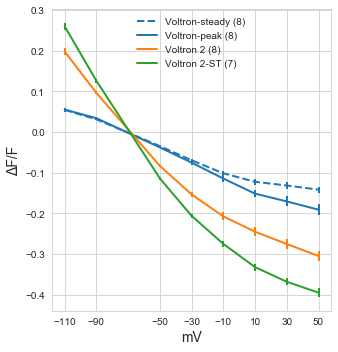

In [16]:
import unicodedata
import seaborn as sns


import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42



fig = plt.figure(figsize=[4.8,5])
sns.set_style('whitegrid')


# n = len(sensors)
# colors = plt.cm.tab20(np.linspace(0,1,n))
# c = 0

colors = {1:'#1f77b4', 2:'#ff7f0e', 3:'#2ca02c', 4:'#d62728'}

i = 1
j = 1
ax = plt.subplot(111)
x = [-110,-90,-50,-30,-10,10,30,50]
lw = 2
for sensor in sensors:
    df_sensor = df_p[(df_p.Mutation==sensor)&(df_p.Objective=='40x oil GENIE')]
    
    if sensor in ['421.1','557.1','558.1']:
        
        param_mean = np.mean(df_sensor.dFF.to_list(),axis=0)
        param_sem = np.std(df_sensor.dFF.to_list(),axis=0)/np.sqrt(len(df_sensor))
    
        ax.errorbar(x, np.flip(param_mean), yerr = np.flip(param_sem), fmt = '--', color = colors[i],lw=lw,
                    label = labels_dict[sensor] +'-steady (%d)' %len(df_sensor))
    
        param_mean = np.mean(df_sensor.peak_dFF.to_list(),axis=0)
        param_sem = np.std(df_sensor.peak_dFF.to_list(),axis=0)/np.sqrt(len(df_sensor))

        ax.errorbar(x, np.flip(param_mean), yerr = np.flip(param_sem), fmt = '-', color = colors[i],lw=lw,
                    label = labels_dict[sensor] +'-peak (%d)' %len(df_sensor))
        i+=1
        j+=1
        
    else:
        param_mean = np.mean(df_sensor.dFF.to_list(),axis=0)
        param_sem = np.std(df_sensor.dFF.to_list(),axis=0)/np.sqrt(len(df_sensor))

        ax.errorbar(x, np.flip(param_mean), yerr = np.flip(param_sem), fmt = '-', color = colors[j],lw=lw,
                    label = labels_dict[sensor] +' (%d)' %len(df_sensor))
        j+=1

    
# Following block remove the errorbars from legend
handles, labels = ax.get_legend_handles_labels() 
handles = [h[0] for h in handles]
ax.legend(handles, labels, loc='upper center', frameon=False)
# ax.legend(handles, labels, frameon=False)


ax.set_xlabel('mV',size=14)
ax.set_ylabel('\u0394F/F',size=14)
plt.setp(ax, xticks=x)
plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/GENIE/Meeting/GENIE post pipeline/201209/Combo_mutations_40x_air.pdf',format='pdf')
# fig.savefig('/Users/zhengj10/Desktop/VARNAM_original_dFF.pdf',format='pdf')
fig.savefig('/Users/zhengj10/Desktop/210310/Voltron 2_F-V_Bens_code.png',dpi=1200)
plt.show()


In [ ]:
len(df_p)

In [ ]:
fig = plt.figure(figsize=[2,4.5])
sns.set_style('whitegrid')
y_pos = [0,1]
ax = plt.subplot(111)
mean_all = []
sem_all = []
labels = ['Voltron','Voltron 2']
for sensor in sensors:
    df_sensor = df[(df.Mutation == sensor)&(df.Objective != '40x air')]
    param_mean = np.mean(df_sensor.F0.to_list(),axis=0)
    param_sem = np.std(df_sensor.F0.to_list(),axis=0)/np.sqrt(len(df_sensor))
    mean_all.append(param_mean[0])
    sem_all.append(param_sem[0])
barlist = ax.bar(y_pos, mean_all, yerr = sem_all)


ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.xticks(y_pos,labels)

plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=True
)

ax.set_ylabel('F0')
    
    
    
# handles, labels = ax.get_legend_handles_labels() 
# handles = [h[0] for h in handles]
# ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.7, 1.02),frameon=False)
# # ax.legend(handles, labels, frameon=False)


# ax.set_xlabel('mV')
# ax.set_ylabel('\u0394F/F')
# plt.setp(ax, xticks=x)
plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/GENIE/Meeting/GENIE post pipeline/201104/Ace2N_sensors_dFF.pdf',format='pdf')
# fig.savefig('/Users/zhengj10/Desktop/F0_Voltron_vs_Voltron 2.pdf',format='pdf')
plt.show()


In [ ]:
param_mean

In [ ]:
sensors

#### deltaF/F traces at 20 mV

In [ ]:
# sns.set()
# sns.set_style(style='whitegrid')
# ax = plt.subplot(1,1,1)

x = np.arange(1,1501)
# fig = plt.figure(figsize=[7,8])
data_dff = {}
for sensor in sensors:
    if sensor in ['421.1','VARNAM','558.1']:
        df_sensor = df[(df.Mutation == sensor)&(df.Objective != '40x air')&(df.peak_dFF != 'N/A')]
    else:
        df_sensor = df[(df.Mutation == sensor)&(df.Objective != '40x air')]
#     print(len(sensor))
    data_dff[sensor] = {}
    data_dff[sensor]['mean'] = []
    data_dff[sensor]['err'] = []
    traces = []
    for index, row in df_sensor.iterrows():

        matFile = os.path.join(imgPath, str(row['Date']), row['Plate'], row['Cell'], '006.mat')
        data = pb.get_data(matFile)
        traces.append(data['dff_corrected_double'][250:1750])

    data_dff_mean = np.mean(traces,axis=0)
    data_dff_err = np.std(traces,axis=0)/np.sqrt(len(df_sensor))
    data_dff[sensor]['mean'].append(data_dff_mean)
    data_dff[sensor]['err'].append(data_dff_err)


In [ ]:
x = np.arange(1,1501)
fig = plt.figure(figsize=[1.6,1.4])
ax = plt.subplot(111)
for sensor in sensors:
#     df_sensor = df[df.Mutation == sensor]
    ax.plot(x, data_dff[sensor]['mean'][0])
    ax.fill_between(x, data_dff[sensor]['mean'][0]+data_dff[sensor]['err'][0],
                   data_dff[sensor]['mean'][0]-data_dff[sensor]['err'][0],alpha=0.2)


# for sensor in sensors:
#     df_sensor = df[df.Mutation == sensor]
#     ax.plot(x, data_dff[sensor]['mean'][0],color=color[sensor])
#     ax.fill_between(x, data_dff[sensor]['mean'][0]+data_dff[sensor]['err'][0],
#                    data_dff[sensor]['mean'][0]-data_dff[sensor]['err'][0],alpha=0.2,color=color[sensor])
    
    


ax.set_xlabel('ms')
ax.set_ylabel('')
ax = plt.gca()
ax.xaxis.set_label_coords(0.9,-0.095)
# ax.set_ylim([-0.3295564576291436, 0.15530348631147196])
# 
plt.tight_layout(pad=-0.06)
# fig.savefig(sumPath + '\\v2\\Voltron_1_vs_Voltron-2_dff_trace_-70-20mV.png',dpi=1200)
# fig.savefig('/Users/zhengj10/Desktop/v4/Single_mutants_dff_trace_-70-20mV_corrected.png',dpi=1200)
# fig.savefig('/Users/zhengj10/Desktop/201104/Ace2N_sensorss_dff_trace_-70-20mV.png',dpi=1200)
plt.show()


In [ ]:
x = np.arange(1,1501)
fig = plt.figure(figsize=[10,3])

colors = {
    '487.6':'#1f77b4',
    '488.6':'#ff7f0e',
    '558.1':'#2ca02c',
    '558.2':'#9467bd'
}


s = 1
for sensor in sensors:
#     df_sensor = df[df.Mutation == sensor]
    ax1 = fig.add_subplot(1,4,s)
    ax1.plot(x, data_dff[sensor]['mean'][0],color = colors[sensor])
    ax1.fill_between(x, data_dff[sensor]['mean'][0]+data_dff[sensor]['err'][0],
                   data_dff[sensor]['mean'][0]-data_dff[sensor]['err'][0],alpha=0.2,color = colors[sensor])
#     ax1.set_ylim([-0.23863890754068354, 0.02123608970983392])
    

    
#     if s==2:
#         print(ax.get_ylim())
    s+=1

# for sensor in sensors:
#     df_sensor = df[df.Mutation == sensor]
#     ax.plot(x, data_dff[sensor]['mean'][0],color=color[sensor])
#     ax.fill_between(x, data_dff[sensor]['mean'][0]+data_dff[sensor]['err'][0],
#                    data_dff[sensor]['mean'][0]-data_dff[sensor]['err'][0],alpha=0.2,color=color[sensor])
    
    


ax1.set_xlabel('ms')
ax1.set_ylabel('')
ax1 = plt.gca()
ax1.xaxis.set_label_coords(0.9,-0.095)
# ax.set_ylim([-0.3295564576291436, 0.15530348631147196])
# 
# plt.tight_layout(pad=-0.06)
plt.tight_layout()
# fig.savefig(sumPath + '\\v2\\Voltron_1_vs_Voltron-2_dff_trace_-70-20mV.png',dpi=1200)
# fig.savefig('/Users/zhengj10/Desktop/v4/Single_mutants_dff_trace_-70-20mV_corrected.png',dpi=1200)
# fig.savefig('/Users/zhengj10/Desktop/201104/Ace2N_sensorss_dff_trace_-70-20mV_horizontal.png',dpi=1200)
plt.show()


#### Kinetics

In [ ]:
fig = plt.figure(figsize=(15,4))

# params = ['tau_on_single','tau_off_single','tau_on_f_double','tau_on_s_double','tau_off_f_double','tau_off_s_double'
#          ,'time_on_10-90','time_off_10-90', 'F0']

# params = ['tau_on_f_double','tau_off_f_double','tau_on_s_double','tau_off_s_double']
# params = ['tau_on_single','tau_off_single']

params = ['tau_on_f_double','tau_off_f_double']

for f in range(len(params)):
    ax = plt.subplot(1,2,f+1)
    mean_all = []
    sem_all = []
    labels = []
    for sensor in sensors:
#         if sensor == 'N4':
#             continue
        df_sensor = df_p[df_p.Mutation == sensor]
        param_mean = np.nanmean(df_sensor[params[f]].tolist(), axis=0)
        param_mean = param_mean[6] # Index is the voltage step (e.g. 6 means 20mV)
        param_sem = np.nanstd(df_sensor[params[f]].tolist(), axis=0)/np.sqrt(len(df_sensor))
        param_sem = param_sem[6] # Index is the voltage step (e.g. 6 means 20mV)
        mean_all.append(param_mean)
        sem_all.append(param_sem)
        labels.append(labels_dict[sensor])

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    y_pos = np.arange(1, len(sensors)+1)
    if f>1:
        plt.xticks(y_pos, labels, rotation=30, ha = 'right')

#     colors = ['k', 'y', 'm', 'c', 'g', 'r', 'b', 'brown']
    else:
        plt.xticks(y_pos, labels, rotation=30, ha = 'right')
        # plt.xticks([]) 
#     colors = ['m', 'c', 'g', 'r', 'b', 'k', 'y', 'brown']
#     for xtick, color in zip(ax.get_xticklabels(), colors):
#         xtick.set_color(color)

    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=True)


    ax.set_ylabel(params[f][:-7]+' (ms)', size=12, weight='light')
    barlist = ax.bar(y_pos, mean_all, yerr = sem_all)
#     barlist[0].set_color('m')
#     barlist[1].set_color('c')
    # barlist[2].set_color('m')
    # barlist[3].set_color('c')
    # barlist[4].set_color('g')
    # barlist[5].set_color('r')
    # barlist[6].set_color('b')
    # barlist[7].set_color('brown')
    # plt.rcParams["axes.labelweight"] = "bold"
    # if params[f] in['tau_off_s_double']:
      #  ax.set_ylim([0,1200])
# ax.set_xticklabels(['1','2'])
plt.tight_layout()
fig.savefig('/Users/zhengj10/Desktop/Kinetics_combo_mutations.pdf',format='pdf')
plt.show()


### I-Clamp data

In [ ]:
df_p = pd.read_pickle(sumPath+'/Summary_IC_all.pkl')

In [ ]:
df_p = df_p[df_p['Date'].isin (['2020.07.22_000','2020.07.23_000']) ]

In [ ]:
df_p[df_p.Mutation=='L2']

In [ ]:
sensors = df_p.Mutation.unique()
# sensors = ['421.1','421.2096']
# sensors = ['421.1', '421.2096', '421.4909', '421.5649', '421.6051', '421.5951', '421.5657', '421.5658', '421.6052']
sensors = ['376.20950','485.20950','L2','533.1']

# for sensor in sensors:
#     print(sensor + ': %d' %len(df_p[df_p['Mutation']==sensor]))
sensors

In [ ]:
import unicodedata
sns.reset_orig()
# fig = plt.figure(figsize=(3.5,8))
# fig = plt.figure(figsize=(2,3))
# fig = plt.figure(figsize=(len(sensors)*0.6,4.5))
fig = plt.figure(figsize=(len(sensors)*0.6,6.5))


labels_dict = {
        '376.20948':'ASAP3b',
        '485.6':'ASAP3b-TS-ER-SOM2',
        '485.20950':'ASAP3b (T392V)-TS-ER-SOM2',
        '376.20950':'ASAP3b (T392V)',
        'L2':'ASAP3b (T392V)-GSS3-SOM2-lTlcnC',
        '533.1':'ASAP3-Kv (Lin)',
        'A122D-ST':'Voltron (A122D)-TS-ER-SOM2',
        '421.1':'Voltron',
        '421.2096':'Voltron 2',
        '421.4909':'421.4909',
        '421.5649':'421.5649',
        '421.6051':'421.6051',
        '421.5951':'421.5951',
        '421.5657':'421.5657',
        '421.5658':'421.5658',
        '421.6052':'421.6052'
}

# colors_dict={
#     '421.1':'xkcd:french blue',
#     '421.2096':'xkcd:dusty red',
#     '421.4909':'#2ca02c',
#     '421.5649':'#d62728',
#     '421.6051':'#9467bd',
#     '421.5951':'#17becf',
#     '421.5657':'#e377c2',
#     '421.5658':'#7f7f7f',
#     '421.6052':'#bcbd22'
# }


# colors=['xkcd:french blue','xkcd:dusty red','#2ca02c','#d62728','#9467bd','#17becf','#e377c2','#7f7f7f','#bcbd22']

params = ['dFF_Jihong']
y_label = [unicodedata.lookup("GREEK CAPITAL LETTER delta")+'F/F0 (%)']
for f in range(len(params)):
    ax = plt.subplot(1,1,f+1)
    mean_all = []
    sem_all = []
    labels = []
    for sensor in sensors:
#         print(sensor)
        df_sensor = df_p[df_p.Mutation == sensor]
#         param_mean = np.nanmean(df_sensor[params[f]].tolist(), axis=0)
        param_mean = df_sensor[params[f]].mean()
#         print(param_mean)
#         param_sem = np.nanstd(df_sensor[params[f]].tolist(), axis=0)/np.sqrt(len(df_sensor))
        param_sem = df_sensor[params[f]].sem()
        mean_all.append(param_mean*100)
        sem_all.append(param_sem*100)
        labels.append(labels_dict[sensor]+' (%d)' %len(df_sensor))
        x = df_sensor.Mutation.to_list()
        y = np.array(df_sensor[params[0]].to_list())*100
        ax.scatter(x,y,edgecolor='k',s=50,facecolors='none')

    y_pos = np.arange(len(sensors))

    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    plt.xticks(y_pos,labels,rotation=30,ha='left')

    plt.tick_params(
        axis='x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False
    )

    ax.set_ylabel(y_label[0],size=12)


#     ax.set_ylim([-0.0027,0.0005])
#     ax.set_ylim([-0.0042,0])
#     ax.set_ylim([-0.0021,0])


    ax.bar(y_pos, mean_all, yerr = sem_all,edgecolor='k',facecolor='none')
#     ax.bar(y_pos, mean_all, yerr = sem_all,color=['xkcd:french blue','xkcd:dusty red'])
#     ax.bar(y_pos, mean_all, yerr = sem_all)


#     plt.xticks(y_pos,labels,size=12,rotation=90)
    plt.xticks(y_pos,labels,size=12,rotation=90,ha='left')

    plt.tick_params(
        axis='x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False,
        labeltop=True
    )
#     plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
#     ax.get_yaxis().get_offset_text().set_position((-0.06,0)) # Adjust position of 1e-3 notation, only x works!
plt.tight_layout()
fig.savefig('/Users/zhengj10/Desktop/dFF_ASAP3_ST-variants.pdf',format='pdf')
plt.show()


In [ ]:
from scipy.stats import f_oneway


In [ ]:
# A = df_p[df_p.Mutation == '421.1']['dFF_Jihong'].to_list()
# B = df_p[df_p.Mutation == '421.2096']['dFF_Jihong'].to_list()
# C = df_p[df_p.Mutation == '421.4909']['dFF_Jihong'].to_list()
# D = df_p[df_p.Mutation == '421.6051']['dFF_Jihong'].to_list()
# E = df_p[df_p.Mutation == '421.5649']['dFF_Jihong'].to_list()
# F = df_p[df_p.Mutation == '421.6052']['dFF_Jihong'].to_list()
# G = df_p[df_p.Mutation == '421.5658']['dFF_Jihong'].to_list()
# H = df_p[df_p.Mutation == '421.5657']['dFF_Jihong'].to_list()
# I = df_p[df_p.Mutation == '421.5951']['dFF_Jihong'].to_list()


# A = df_p[df_p.Mutation == '376.20950']['dFF_Jihong'].to_list()
# B = df_p[df_p.Mutation == '485.20950']['dFF_Jihong'].to_list()
# C = df_p[df_p.Mutation == 'L2']['dFF_Jihong'].to_list()
# D = df_p[df_p.Mutation == '533.1']['dFF_Jihong'].to_list()


A = df_p[df_p.Mutation == '376.20950']['dFF_norm_Jihong'].to_list()
B = df_p[df_p.Mutation == '485.20950']['dFF_norm_Jihong'].to_list()
C = df_p[df_p.Mutation == 'L2']['dFF_norm_Jihong'].to_list()
D = df_p[df_p.Mutation == '533.1']['dFF_norm_Jihong'].to_list()


In [ ]:
f_oneway(A,B,C,D)

In [ ]:
# sensors

In [ ]:
df_p.Mutation.unique()

#### Cell images & AP trace

In [ ]:
df_sel = df[df.Mutation.isin(['N4','O5','M3','L2','Q7','P6','S9','T10','R8','W13','X14','Y15','487.1','U11',
       'V12', 'K1'])]
# df_sel = df.Mutation.unique()
df_sel

In [ ]:
import shutil
for idx,r in df_sel.iterrows():

    img = os.path.join(rawPath,r['Date'],r['Plate'],r['Cell'],'fluor_image_000.tif')
    
    
    
    dest = '/Users/zhengj10/Desktop/ASAP_images/'+labels_dict[r['Mutation']]
    if not os.path.exists(dest):
        os.mkdir(dest)
    shutil.copyfile (img , dest+'/'+r['Cell']+'.tif' )

In [ ]:
fig = plt.figure(figsize=[15,10])

a = 1

for idx,r in df_sel.iterrows():

    img = os.path.join(rawPath,r['Date'],r['Plate'],r['Cell'],'fluor_image_000.tif')
    img = tff.TiffFile(img)
    img = img.asarray()
#     img = img[192:320,192:320]

#     dataFile = os.path.join(rawPath,r['Date'],r['Plate'],r['Cell'],'I_clamp1_000/000/Clamp1.ma')
#     dataFile = os.path.join(rawPath,r['Date'],r['Plate'],r['Cell'],'camera_clamp1_000/000/Clamp1.ma')
#     data = h5py.File(dataFile,'r')
#     traces = data['data'][()]
#     traces[1,:] = traces[1,:]*1e3
#     traces[1,8000:8080] = traces[1,8000:8080] - r['Rs_uncorrected']
#     trace = traces[1,:][7980:8150]
    if a<=6:
        ax1 = plt.subplot(1,5,a)
        ax1.imshow(img,cmap='gray')


    a+=1
plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/533.1.pdf',format='pdf')
plt.show()


In [ ]:
from skimage.io import imsave

In [ ]:
fig = plt.figure(figsize=[15,10])

a = 1

for idx,r in df_sel.iterrows():
    for trial in range(9):

        img = os.path.join(rawPath,r['Date'],r['Plate'],r['Cell'],'camera_clamp1_000',str(trial).zfill(3),'Camera/frames.ma')

    print(os.path.join(r['Date'],r['Plate'],r['Cell']))
#         img = h5py.File(img,'r')
#         img = img['data'][()]
#         print(img.shape)
#         savePath = '/Users/zhengj10/Desktop/533.1/'+r['Cell']
#         if not os.path.exists(savePath):
#             os.mkdir(savePath)
#         print(savePath)
#         imsave(savePath+'/'+str(trial).zfill(3)+'.tif',img.astype('float32'))
       

    a+=1
plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/533.1.pdf',format='pdf')
plt.show()


In [ ]:
# fig = plt.figure(figsize=[15,15])

# a = 1

# for idx,r in df_sel.iterrows():

#     img = os.path.join(rawPath,r['Date'],r['Plate'],r['Cell'],'fluor_image_000.tif')
#     img = tff.TiffFile(img)
#     img = img.asarray()
#     img = img[192:320,192:320]
# #     dataFile = os.path.join(rawPath,r['Date'],r['Plate'],r['Cell'],'I_clamp1_000/000/Clamp1.ma')
#     dataFile = os.path.join(rawPath,r['Date'],r['Plate'],r['Cell'],'camera_clamp1_000/000/Clamp1.ma')
#     data = h5py.File(dataFile,'r')
#     traces = data['data'][()]
#     traces[1,:] = traces[1,:]*1e3
#     traces[1,8000:8080] = traces[1,8000:8080] - r['Rs_uncorrected']
#     trace = traces[1,:][7980:8150]
#     if a<=6:
#         ax1 = plt.subplot(16,6,a)
#         ax1.imshow(img,cmap='gray')
#         ax2 = plt.subplot(16,6,a+6)
#         ax2.plot(trace)
#     elif 6<a<=12:
#         ax1 = plt.subplot(16,6,a+6)
#         ax1.imshow(img,cmap='gray')
#         ax2 = plt.subplot(16,6,a+12)
#         ax2.plot(trace)
#     elif 12<a<=18:
#         ax1 = plt.subplot(16,6,a+12)
#         ax1.imshow(img,cmap='gray')
#         ax2 = plt.subplot(16,6,a+18)
#         ax2.plot(trace)
#     else:
#         ax1 = plt.subplot(16,6,a+18)
#         ax1.imshow(img,cmap='gray')
#         ax2 = plt.subplot(16,6,a+24)
#         ax2.plot(trace)
#     ax1.set_title(r['Mutation']+' ('+r['Cell'][-8:-4]+')')

#     a+=1
# plt.tight_layout()
# plt.show()


In [ ]:
# df_sel.index = np.arange(len(df_sel))
# fig = plt.figure(figsize=[15,15])

# a = 1

# for idx,r in df_sel.iterrows():

#     img = os.path.join(rawPath,r['Date'],r['Plate'],r['Cell'],'fluor_image_000.tif')
#     img = tff.TiffFile(img)
#     img = img.asarray()
#     img = img[192:320,192:320]

# #     dataFile = os.path.join(rawPath,r['Date'],r['Plate'],r['Cell'],'I_clamp1_000/000/Clamp1.ma')
#     dataFile = os.path.join(rawPath,r['Date'],r['Plate'],r['Cell'],'camera_clamp1_000/000/Clamp1.ma')
#     if r['Mutation'] == '421.5951':
#         print(str(idx), os.path.join(rawPath,r['Date'],r['Plate'],r['Cell']))
#     data = h5py.File(dataFile,'r')
#     traces = data['data'][()]
#     traces[1,:] = traces[1,:]*1e3
#     traces[1,8000:8080] = traces[1,8000:8080] - r['Rs_uncorrected']
#     trace = traces[1,:][7980:8150]

#     ax2 = plt.subplot(8,6,a)
#     ax2.plot(trace)
    
#     ax2.set_title(r['Mutation']+' ('+r['Cell'][-8:-4]+')')

#     a+=1
# plt.tight_layout()
# plt.show()


In [ ]:
df_sel.drop(26,inplace=True)

#### Example neuron

In [ ]:
example_neuron = '/Volumes/Backup Plus/PatcherBot/raw/2020.10.01_000/plate_000/patch_attempt_0005_000/'

In [ ]:
fig=plt.figure(figsize=[2.5,2.5])

ax = plt.subplot(111)
imgFile = os.path.join(example_neuron,'fluor_image_000.tif')
imgFile = tff.TiffFile(imgFile)
imgFile = imgFile.asarray()
ax.imshow(imgFile[206:306,206:306],cmap='gray')
ax.set_axis_off()
# ax.set_title(r['Mutation']+' ('+r['Cell'][-8:-4]+')')
ax.plot([75,90.38],[90,90],color='w',lw=3)
# plt.tight_layout()
# fig.savefig(sumPath+'/Voltron_image.png')
plt.show()
# print(np.min(imgFile[206:306,206:306]))
# print(np.max(imgFile[206:306,206:306]))


In [ ]:
sns.set()
sns.set_style(style='whitegrid')
fig = plt.figure(figsize=(2.2,1.8))
ax = plt.subplot(111)
trace_all = []
for trial in range(10):
    dataFile = os.path.join(example_neuron,'I_clamp1_000',str(trial).zfill(3),'Clamp1.ma')
    data = h5py.File(dataFile,'r')
    traces = data['data'][()]
    traces = traces*1000 # converted to mV
    trace_all.append(traces[1,:])
trace_mean = np.mean(trace_all,axis=0)

trace_AP_seg_corrected = trace_mean[8000:8080]-2*0.522519
trace_mean[8000:8080] = trace_AP_seg_corrected

x = np.linspace(0,100,4000)
ax.plot(x,trace_mean[7200:11200],color = 'xkcd:french blue')
# ax.plot(x,trace_mean[7200:11200],color = 'xkcd:dusty red')
ax.set_ylim([-72.5432468476216, 41.391135206531445])
ax.set_xlabel('ms')
ax.set_ylabel('mV')
plt.tight_layout()
# fig.savefig(sumPath+'/Voltron_AP_trace.png',dpi=1200)
plt.show()


In [ ]:
def get_dff(dataFile):
    data = h5py.File(dataFile,'r')
    trace = data['data'][()]
    ref = np.mean(trace[10:60,:,:],axis=0)
    fb = np.min(ref)
    crop = ref[224:284,:]
    max_val = np.max(crop)
    act_pix = crop > (fb + (max_val-fb)*0.67)
    f = []
    for frame in range(trace.shape[0]):
        f_single_frame = np.sum(trace[frame,224:284,:]*act_pix)/np.sum(act_pix)
        f.append(f_single_frame)
    f_peak = np.min(f)
    f_peak_idx = np.argmin(f)
#     print ('peak idx: %s' %(f_peak_idx))
    f0 = np.mean(f[f_peak_idx-40:f_peak_idx-20])
    f = np.array(f)
    dff = (f-f0)/(f0-fb)
    dff_peak = (f_peak-f0)/(f0-fb)
    return dff,dff_peak,f_peak_idx,f,f0


In [ ]:
import unicodedata
fig = plt.figure(figsize=(2.2,1.8))

y_label = [unicodedata.lookup("GREEK CAPITAL LETTER delta")+'F/F/mV (%)']
ax = plt.subplot(111)
dff_all = []
for trial in range(10):
    dataFile = os.path.join(example_neuron,'I_clamp1_000',str(trial).zfill(3),'Camera','frames.ma')
    data = h5py.File(dataFile,'r')
    dff,dff_peak,f_peak_idx,f,f0 = get_dff(dataFile)
    dff_all.append(dff[:1800])
dff_mean = np.mean(dff_all,axis=0)
dff_mean = dff_mean*100
x = np.linspace(1,100,95)
ax.plot(x,dff_mean[154:249],color='xkcd:french blue')
# ax.plot(x,dff_mean[154:249],color='xkcd:dusty red')
ax.set_ylabel(y_label[0])
ax.set_ylim([-9.82281514349218, 3.7823283282636435])
plt.tight_layout()
# fig.savefig(sumPath+'/Voltron_dFF_single_AP.png',dpi=1200)
plt.show()
